In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [ ]:
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [ ]:
file_path = "./ref/history_dummy_data_v3.csv"
history_df = pd.read_csv(file_path, encoding = "EUC-KR") # 우분투일 때는 utf 파일은 생략 가능~

In [18]:
history_df['cell_date'] = pd.to_datetime(history_df['cell_date'])

In [19]:
history_df['year_month'] = history_df['cell_date'].dt.to_period('M')
monthly_sales = history_df.groupby(['year_month', 'prod_category'])['cell_amount'].sum().unstack()

<Figure size 1200x600 with 0 Axes>

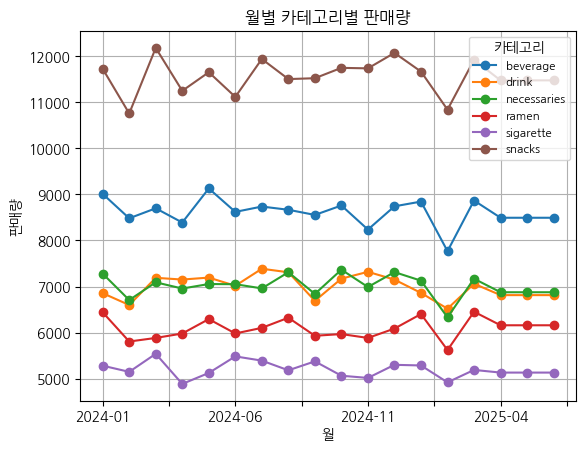

In [28]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('월별 카테고리별 판매량')
plt.xlabel('월')
plt.ylabel('판매량')
plt.legend(title='카테고리', loc='upper right', fontsize='small')
plt.savefig("./ref/chart/월별_카테고리별_판매량.png")
plt.grid(True)
plt.show()

In [21]:
predicted_q2_sales = monthly_sales.loc['2025-01':'2025-03'].mean()
for month in ['2025-04', '2025-05', '2025-06']:
    monthly_sales.loc[month] = predicted_q2_sales

<Figure size 1200x600 with 0 Axes>

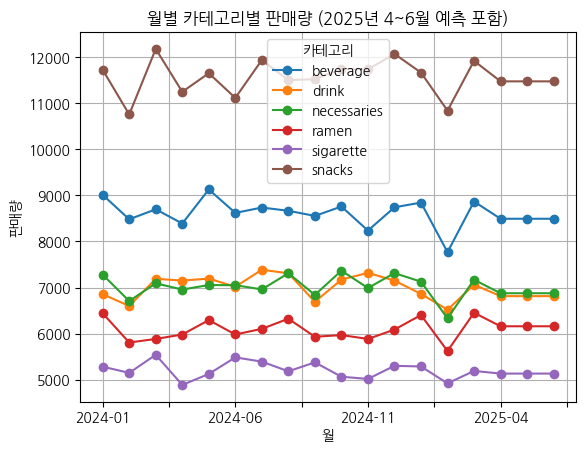

In [22]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('월별 카테고리별 판매량 (2025년 4~6월 예측 포함)')
plt.xlabel('월')
plt.ylabel('판매량')
plt.legend(title='카테고리')

plt.grid(True)
plt.show()

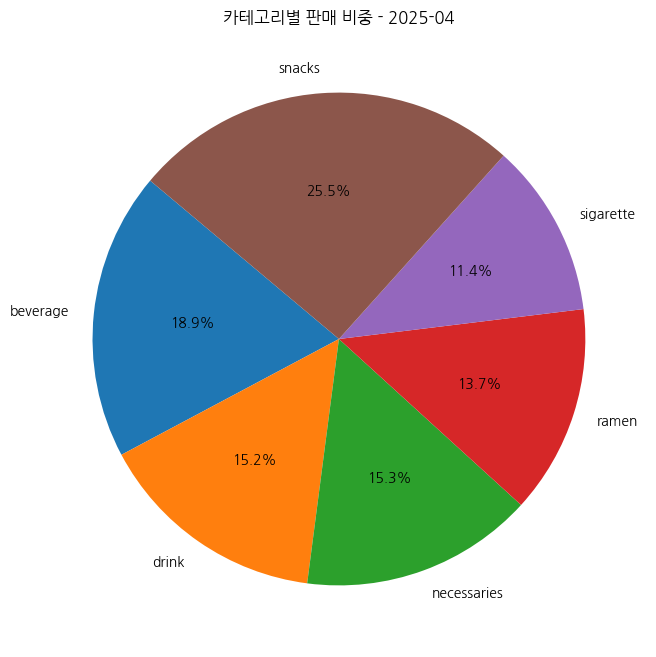

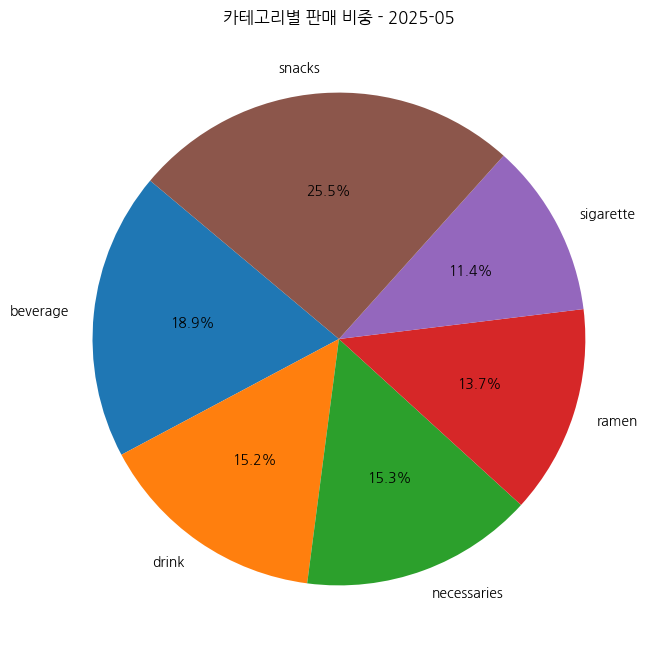

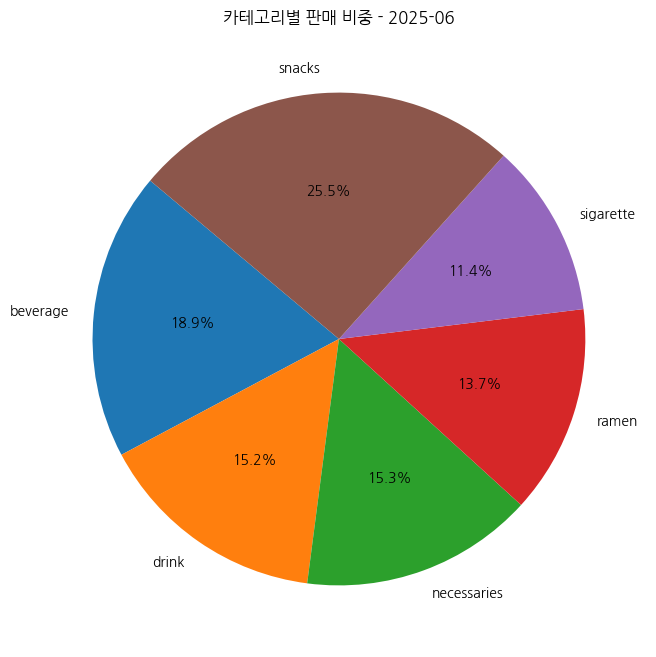

In [25]:
for month in ['2025-04', '2025-05', '2025-06']:
    plt.figure(figsize=(8, 8))
    monthly_sales.loc[month].plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'카테고리별 판매 비중 - {month}')
    plt.ylabel('')  # y축 라벨 제거
    plt.savefig(f"./ref/chart/카테고리별 판매 비중 - {month}.png")
    plt.show()